In [1]:
import pandas as pd

In [8]:
from collections import Counter
import networkx as nx

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

In [5]:
ment = pd.read_csv('Shodhganga_mentorship.csv', sep = ",")

In [6]:
mod_ment = pd.read_csv('mod_shodhganga_mentorship.csv', sep =",")

In [72]:
#inx = pd.read_csv('Shodhganga_indexed.csv', sep = ",")

In [71]:
#inx[inx["rid"]==1124]

In [57]:
ment[ment["advisorId"]==1124]

,advisorId,researcherId,advId_1,studId_1,advisor_name,researcher_name,dc.date.submitted[],dc.language.iso[],dc.publisher.department[],DepartmentId,dc.publisher.institution[],instituteId,dc.title[],thesisId,dc.type.degree,dc.date.awarded,dc.subject.ddc,dc.source.uri,dc.description.abstract,dc.title.alternative
2171,1124,77734,1124,1124,Tiwari S. A.,Tiwari S A,20-02-2004,eng,department of commerce,D1072,Sant Gadge Baba Amravati University,I265,Study of Business Education of University Leve...,T28568,phd,20-03-2005,"300::Social sciences|380::Commerce, communicat...",http://shodhganga.inflibnet.ac.in/,NaN,NaN


In [6]:
ment.columns

Index(['advisorId', 'researcherId', 'advId_1', 'studId_1', 'advisor_name',
       'researcher_name', 'dc.date.submitted[]', 'dc.language.iso[]',
       'dc.publisher.department[]', 'DepartmentId',
       'dc.publisher.institution[]', 'instituteId', 'dc.title[]', 'thesisId',
       'dc.type.degree', 'dc.date.awarded', 'dc.subject.ddc', 'dc.source.uri',
       'dc.description.abstract', 'dc.title.alternative'],
      dtype='object')

In [9]:
graph = nx.convert_matrix.from_pandas_edgelist(ment, 'advisorId','researcherId', create_using=nx.DiGraph())

In [17]:
len(graph.nodes())

238442

In [1]:
graph1 = nx.convert_matrix.from_pandas_edgelist(ment, 'advId_1','studId_1',create_using=nx.DiGraph())

NameError: name 'nx' is not defined

In [18]:
len(graph1.nodes())

227489

In [9]:
graph2 = nx.convert_matrix.from_pandas_edgelist(mod_ment, 'advId_1','studId_1',create_using=nx.DiGraph())

In [12]:
print(nx.number_weakly_connected_components(graph))

46370


In [13]:
print(nx.number_weakly_connected_components(graph1))

38001


In [10]:
print(nx.number_weakly_connected_components(graph2))

44163


In [20]:
components = list(nx.weakly_connected_components(graph2))

In [36]:
components.sort(key=len, reverse=True)

In [37]:
len(components[1])

169

In [14]:
components_size = [len(c) for c in components]

In [32]:
components_size[0:10]

[94610, 169, 131, 116, 102, 74, 74, 72, 70, 70]

In [15]:
component_freq = Counter(components_size)

In [16]:
component_freq

Counter({94610: 1,
         169: 1,
         131: 1,
         116: 1,
         102: 1,
         74: 2,
         72: 1,
         70: 2,
         65: 2,
         63: 1,
         60: 2,
         59: 1,
         57: 2,
         53: 2,
         52: 1,
         51: 1,
         50: 2,
         49: 2,
         48: 1,
         47: 2,
         46: 2,
         45: 1,
         44: 2,
         43: 3,
         42: 2,
         41: 4,
         40: 1,
         39: 3,
         38: 5,
         37: 4,
         36: 4,
         35: 9,
         34: 3,
         33: 6,
         32: 9,
         31: 9,
         30: 3,
         29: 8,
         28: 12,
         27: 19,
         26: 7,
         25: 17,
         24: 19,
         23: 20,
         22: 22,
         21: 20,
         20: 35,
         19: 44,
         18: 43,
         17: 57,
         16: 75,
         15: 84,
         14: 100,
         13: 129,
         12: 158,
         11: 160,
         10: 287,
         9: 394,
         8: 517,
         7: 743,
       

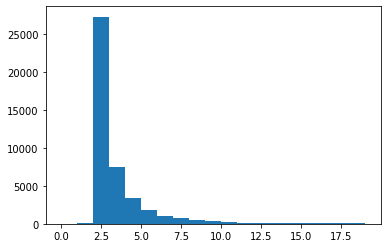

In [17]:
plt.hist(components_size, bins=np.arange(0,20,1))
plt.show()

In [16]:
components1 = list(nx.weakly_connected_components(graph1))

In [20]:
components1.sort(key=len, reverse=True)

In [62]:
len(components1[0])

105422

In [60]:
#components1[-70:-50]

In [52]:
components_size1 = [len(c) for c in components1]

In [55]:
components_size1[-70: -50]

[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [53]:
component_freq1 = Counter(components_size1)

In [61]:
#component_freq1

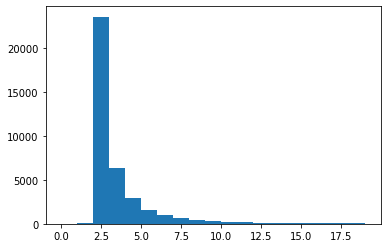

In [59]:
plt.hist(components_size1, bins=np.arange(0,20,1))
plt.show()

In [38]:
cc_graph =graph2.subgraph(components[1])

In [39]:
pos1 = nx.spring_layout(cc_graph)

In [40]:
pos = nx.random_layout(cc_graph)

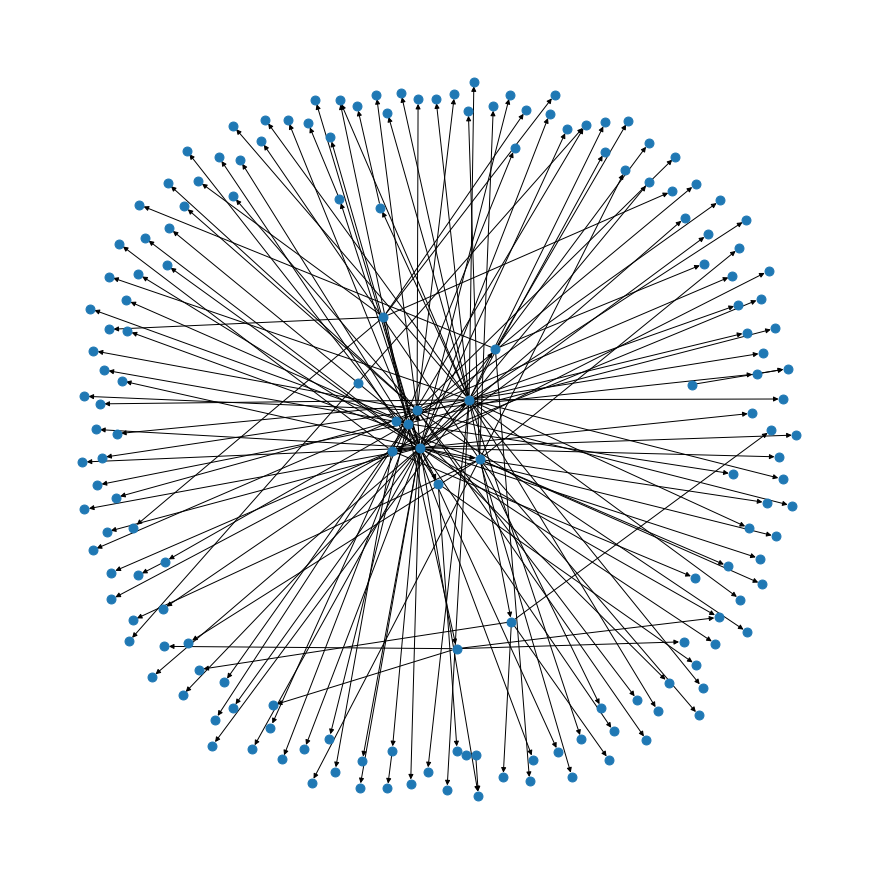

In [41]:
plt.figure(figsize=(12,12)) 
nx.draw(cc_graph,pos1, node_size=80,font_size=8)#with_labels=True)
plt.show()

In [ ]:
#nx.draw_random(cc_graph, with_labels = True, node_color ='green')

In [ ]:
#nx.draw_spring(cc_graph, with_labels = True, node_color ='green')

In [ ]:
#largest = max(nx.weakly_connected_components(graph1),key=len)

In [ ]:
#largest